In [1]:
%matplotlib inline
import numpy as np
import matplotlib

# Logistic回归
***优点:*** 计算代价不高，易于理解和实现  
***缺点:*** 容易欠拟合，分类精度可能不高  
***适用数据类型:*** 数值型和标称型

将每个特征都乘以一个回归系数，然后相加，将总和代入Sigmoid函数  
***Sigmod函数:*** $\sigma (z)=\frac{1}{1+e^{-z}}$  

In [2]:
def sigmod(inX):
    return 1.0 / (1 + np.exp(-inX))

$z=W^TX = w_0x_0 + w_1x_1 +...+w_nx_n$  
__**可以利用添加$x_0=1.0$来作为常数项**__  
为了求最优$w$,适用梯度上升法  
***梯度:*** $\triangledown f(x,y) = \binom{\frac{\partial f(x,y)}{\partial x}}{\frac{\partial f(x,y)}{\partial y}}$  
***梯度上升:*** $w:=w+\alpha \triangledown _wf(w)$  
***梯度下降:*** $w:=w-\alpha \triangledown _wf(w)$  

_本章测试数据_

In [3]:
def loadDataSet():
    dataMat, labelMat = [],[]
    with open('data/testSet_LR.txt') as fr:
        for line in fr.readlines():
            lineArr = line.strip().split()
            dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
            labelMat.append(int(lineArr[2]))
        return dataMat, labelMat
dataMat, labelMat = loadDataSet()

### 训练算法：梯度上升
```
每个回归系数初始化为1
重复R次：
  计算整个数据集的梯度
  适用alpha x gradient更新回归系数的向量
  返回回归系数
```

sigmod函数

In [4]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)
    labelMat= np.mat(classLabels).transpose()
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n,1))
    for k in range(maxCycles):
        h = sigmod(dataMatrix*weights)
        error = (labelMat - h)
        weights = weights + alpha + dataMatrix.transpose() * error
    return weights

测试

In [5]:
weights = gradAscent(dataMat, labelMat)
weights

matrix([[1187.47622175],
        [ 109.75798393],
        [-142.50421711]])

画出决策边界(测试)

In [6]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr) [0]
    xcord1, ycord1 = [], []
    xcord2, ycord2 = [], []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    # 设sigmod(z) = 0 分界， 解方程得到的最佳拟合曲线
    y = (-weights[0] - weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

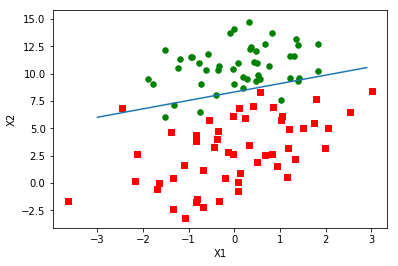

In [7]:
plotBestFit(weights.getA())

### 训练算法：随机梯度上升
```
所有回归系数初始化为1
对数据集中每个样本:
  计算该样本的梯度
  适用alpha x gradient更新回归系数值
返回回归系数值
```
是一种在线学习算法

In [8]:
def stocGradAscent0(dataMatrix, classLabels):
    m, n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        # 注意这里的h和error都是数值
        h = sigmod(np.sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

测试

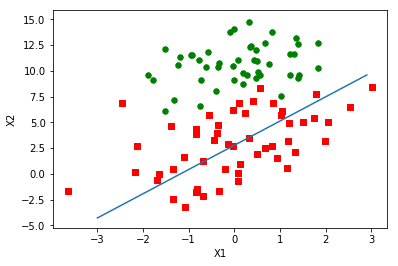

In [9]:
weights = stocGradAscent0(np.array(dataMat), labelMat)
plotBestFit(weights)

###### 改进

In [16]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01 # alpha每次迭代需要调整
            randIndex = np.int(np.random.uniform(0, len(dataIndex))) #随机选取更新
            h = sigmod(np.sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

测试

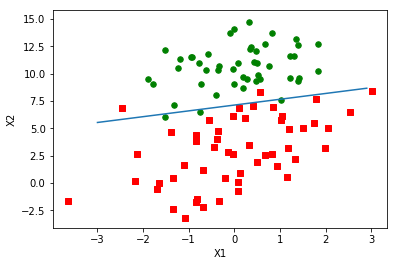

In [17]:
weights = stocGradAscent1(np.array(dataMat), labelMat)
plotBestFit(weights)